In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing required libraries

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

In [ ]:
# For checking GPU as runtime type
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

2.5.0
Default GPU Device: /device:GPU:0


In [ ]:
img_width , img_height = 128, 128                         # changing the resolution to 128 X 128 
train_data_dir = 'gdrive/My Drive/Covid Model/train/'     # Train dir path
validation_data_dir = 'gdrive/My Drive/Covid Model/test/' # Test dir path
epochs =50                                                # 50 epochs are used
batch_size = 32                                           # Batch size is 32

In [ ]:
# Image data Format 

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
# Data Generator of keras is used for preprocessing
train_datagen = ImageDataGenerator(
    rescale = 1./ 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1. /255)

In [ ]:
# Training and testing data 
# 3 Classes - COVID-19 , NORMAL , PNEUMONIA
# Training data -> 10725
# Testing data -> 4647

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

Found 10725 images belonging to 3 classes.
Found 4647 images belonging to 3 classes.


In [ ]:
"""
Before this model, with exact filters and kernal size. we used keras tuner to getting the number of filters and kernel sizes for individual 
convolution layers. The sequential model was run for 20 repetition and 2 epochs for each. Through those 20 repetitions the best number for filters and
kernal sizes were given as output for the best training parameters and for training modle for best of the accuracy. 

So for the current model it have 879,603 Trainable params.

Before this model was trained we have trained other model for the Dropout(0.5) and found the results we not satisfactory so we switched to Dropout to 0.2 
it produced a better model with 95.04% training accuracy and 94.14 testing accuracy.
"""

model = Sequential()    # for making stack of layers
model.add(Conv2D(96,(5,5), input_shape = input_shape, activation = 'relu')) # 96 are filters and 5X5 is kernel size for convoltuion
model.add(MaxPooling2D(pool_size = (2,2)))   # in every 2x2 matrix it select max value to reduce image size

model.add(Conv2D(48,(3,3), activation = 'relu'))  # 48 filters and 3X3 kernel size
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten()) #‘unstack’ all this multidimensional tensor into a very long 1D tensor (helpful for dense func)
model.add(Dense(64)) # output size is 64  activation(np.dot(input, kernel)+bias )
model.add(Activation('relu'))
model.add(Dropout(0.2)) # used to tackle overfitting
model.add(Dense(3))
model.add(Activation('softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 124, 124, 96)      7296      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 48)        41520     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        27712     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model.fit_generator(
    train_generator,
    steps_per_epoch= 10725 // batch_size,
    epochs= epochs,
    validation_data=validation_generator,
    validation_steps= 4647 // batch_size )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
335/335 [==============================] - 1093s 3s/step - loss: 0.7899 - accuracy: 0.6192 - val_loss: 0.5099 - val_accuracy: 0.7901
Epoch 2/50
335/335 [==============================] - 169s 504ms/step - loss: 0.5337 - accuracy: 0.7810 - val_loss: 0.4036 - val_accuracy: 0.8373
Epoch 3/50
335/335 [==============================] - 168s 503ms/step - loss: 0.4916 - accuracy: 0.8030 - val_loss: 0.4200 - val_accuracy: 0.8364
Epoch 4/50
335/335 [==============================] - 169s 503ms/step - loss: 0.4290 - accuracy: 0.8248 - val_loss: 0.3342 - val_accuracy: 0.8741
Epoch 5/50
335/335 [==============================] - 168s 503ms/step - loss: 0.4097 - accuracy: 0.8403 - val_loss: 0.3368 - val_accuracy: 0.8709
Epoch 6/50
335/335 [==============================] - 168s 503ms/step - loss: 0.3670 - accuracy: 0.8507 - val_loss: 0.3155 - val_accuracy: 0.8776
Epoch 7/50
335/335 [==============================] - 168s 502ms/step - loss: 0.3617 - accuracy: 0.8555 - val_loss: 0.3240 - v

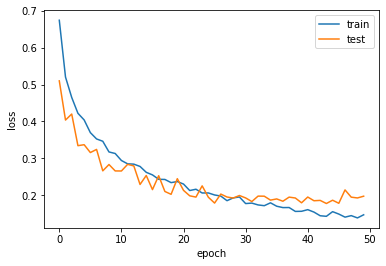

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')

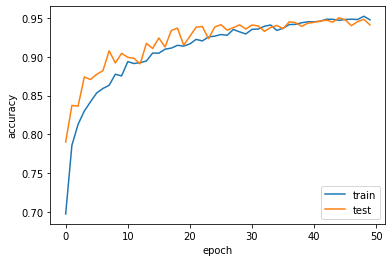

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

In [ ]:
model.save_weights('gdrive/My Drive/Covid Model/31May/M5_31May_weighted.h5')
model.save('gdrive/My Drive/Covid Model/31May/M5_31May_model.h5')